# Autotuning Notebook

## Import Library

In [1]:
from analysis import Analyser 
from measurement import MultiChannelDevice 

## QCoDes Investigation

In this section, I perform some preliminary experiments to get to grips with QCoDes.

### MOSFET: 2D Scan ($V_{gate} = -2$ to $2V$, $V_{SD} = -2$ to $2V$)

In [7]:
qdac_visa = "ASRL/dev/ttyUSB0::INSTR"
dmm_visa = "TCPIP0::169.254.4.10::inst0::INSTR"

In [13]:
# You can pass your parameters as a dictionary
sweep_parameters = {
    'channel_number_1': 17,
    'channel_number_2': 18,
    'database_file':"mosfet_measurements.db",
    'experiment_name':"tests",
    'device_name': "mosfet1",
    'max_voltage_ch1': 4, 
    'min_voltage_ch1': -2, 
    'max_voltage_ch2': 4, 
    'min_voltage_ch2': -2, 
    'number_of_steps_ch1': 100,
    'number_of_steps_ch2': 100
    
}

transistor = MultiChannelDevice(qdac_visa, dmm_visa, print_dac_overview=False) 
transistor.dc_2d_gate_sweep(**sweep_parameters)

# Or you can pass your parameters the traditional way, though the dictionary is more visually pleasing.
# transistor.dc_2d_gate_sweep(channel_number_1=17, channel_number_2=18, device_name="mosfet1", experiment_name="tests", database_file="mosfet_measurements.db", 
#                  max_voltage_ch1=-2, min_voltage_ch1 = 2, max_voltage_ch2=2, min_voltage_ch2 = -2, 
#                      number_of_steps_ch1 = 10,number_of_steps_ch2 = 10)

transistor.close_connections()

Connected to QDAC on ASRL/dev/ttyUSB0::INSTR at 12:29:42.
Connected to: Agilent Technologies 34410A (serial:MY47007133, firmware:2.35-2.35-0.09-46-09) in 0.17s


Channel 17 progress::   0%|          | 0/100 [00:00<?, ?it/s]

Channel 18 progress::   0%|          | 0/100 [00:00<?, ?it/s]

Starting experimental run with id: 3. 
Measurement complete.
Any connection to the DAC and DMM has been closed.


### MOSFET: 1D Scan ($V_{gate} = 1.8V$, $V_{SD} = -2$ to $2V$)

In [ ]:
transistor = MultiChannelDevice(qdac_visa, dmm_visa, print_dac_overview=False)  
transistor.dc_1d_gate_sweep(channel_number_1=17, channel_number_2=18, device_name="mosfet1",experiment_name="tests", database_file="mosfet_measurements.db", 
                 fixed_voltage_ch1=-2, max_voltage_ch2=2, min_voltage_ch2 = -2,number_of_steps_ch2 = 100)
transistor.close_connections()

### Open database file to analyse (output experiments in database)

In [10]:
analyse = Analyser(database_file = "mosfet_measurements.db")

The experiments found in mosfet_measurements.db are:
[tests#mosfet1#1@/mnt/mesure/measurement_results/mosfet_measurements.db
----------------------------------------------------------------------
1-2d_sweep-1-qdac_chan17_v,qdac_chan18_v,DMM_volt-100
2-2d_sweep-2-qdac_chan17_v,qdac_chan18_v,DMM_volt-100]


### See the datasets collected for each experiment

In [11]:
analyse.datasets_in_experiments(experiment_name ="tests", device_name="mosfet1")

[2d_sweep #1@/mnt/mesure/measurement_results/mosfet_measurements.db
------------------------------------------------------------------
qdac_chan17_v - numeric
qdac_chan18_v - numeric
DMM_volt - numeric, 2d_sweep #2@/mnt/mesure/measurement_results/mosfet_measurements.db
------------------------------------------------------------------
qdac_chan17_v - numeric
qdac_chan18_v - numeric
DMM_volt - numeric]


### Visualise a specific dataset collected during an experiment

                             DMM_volt
qdac_chan17_v qdac_chan18_v          
-2.0          -2.000000     -0.538354
              -1.939394     -0.538344
              -1.878788     -0.538333
              -1.818182     -0.538323
              -1.757576     -0.538312


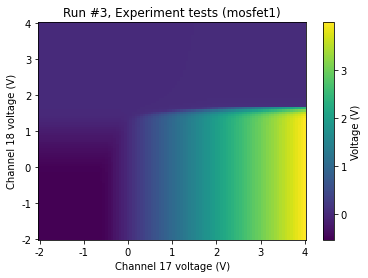

In [14]:
analyse.display_experiment_dataset(experiment_name ="tests", run_id=3)

In [ ]:
# analyser
#     experiments
#         datasets_in_experiments